<a href="https://colab.research.google.com/github/rahuljungbahadur/hands_on_ml_book/blob/main/Rnn_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [3]:
ser1 = generate_time_series(1, 5)

In [5]:
import matplotlib.pyplot as plt


In [7]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [9]:
import tensorflow as tf

In [22]:
X_train.shape

(7000, 50, 1)

In [10]:
y_pred = X_valid[:, -1]
np.mean(tf.keras.losses.mean_squared_error(y_valid, y_pred))

0.02146086

## Simple linear regression model

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[50, 1]),
    tf.keras.layers.Dense(1)
])

In [13]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_valid, y_valid))

validation loss is 0.004. This is much better than the naive forecast error `mse` of 0.020

## SimpleRNN

In [16]:
model=tf.keras.models.Sequential(
    [tf.keras.layers.SimpleRNN(units=1, input_shape=(None, 1))]
)

In [17]:
model.compile(optimizer='adam', loss='mse')
model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 3s 9ms/step - loss: 0.0569 - val_loss: 0.0459
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0377 - val_loss: 0.0307
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0249 - val_loss: 0.0206
Epoch 4/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0170 - val_loss: 0.0152
Epoch 5/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0133 - val_loss: 0.0129
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0119 - val_loss: 0.0123
Epoch 7/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0115 - val_loss: 0.0120
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0113 - val_loss: 0.0120
Epoch 9/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0113 - val_loss: 0.0119
Epoch 10/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0112 - val_loss: 0.0119

## A deep SimpleRNN

In [18]:
model_deepRnn = tf.keras.models.Sequential(
    [tf.keras.layers.SimpleRNN(units=20, return_sequences=True, input_shape=(None, 1)),
     tf.keras.layers.SimpleRNN(units=20, return_sequences=True),
     tf.keras.layers.SimpleRNN(units=1, return_sequences=False)]
)

In [19]:
model_deepRnn.compile(optimizer='adam', loss='mse')
model_deepRnn.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 9s 30ms/step - loss: 0.0185 - val_loss: 0.0052
Epoch 2/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0041 - val_loss: 0.0034
Epoch 3/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 4/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 5/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 6/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 7/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 8/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 9/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 10/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0027 - val_lo

## SimpleRNN with `Dense` Layer at the end and no activation function

In [21]:
model_deepRnnDense = tf.keras.models.Sequential(
    [tf.keras.layers.SimpleRNN(units=20, return_sequences=True, input_shape=(None, 1)),
     tf.keras.layers.SimpleRNN(units=20),
     tf.keras.layers.Dense(units=1)]
)


model_deepRnnDense.compile(optimizer='adam', loss='mse')
model_deepRnnDense.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 6s 22ms/step - loss: 0.0176 - val_loss: 0.0055
Epoch 2/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 3/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 4/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 5/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 6/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 7/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 8/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 9/10
219/219 [==============================] - 4s 19ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 10/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0029 - val_lo

## Creating predictions n steps in the future

Generate predictions and feed it back to the model for predicting the next timestep

In [31]:
predictions = model_deepRnnDense.predict(X_test)

In [32]:
predictions.shape

(1000, 1)

In [39]:
predictions[0]

array([0.2250741], dtype=float32)

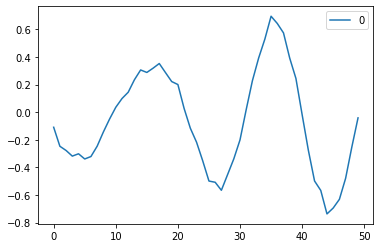

In [27]:
pd.DataFrame(X_test[0]).plot(kind='line')